### 한국어 감성분석🤔

📌 데이터 불러오기

In [32]:
# txt 파일 불러오기
train_df = pd.read_table('../DATA/ratings_train.txt', encoding = 'utf-8')
train_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [35]:
test_df = pd.read_table('../DATA/ratings_test.txt', encoding = 'utf-8')
test_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


📌 탐색적 데이터 분석

In [49]:
print('train shape :', train_df.shape)
train_df.head(3)

train shape : (150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [38]:
# 레이블별 개수
cnt = train_df['label'].value_counts()
print(cnt)

0    75173
1    74827
Name: label, dtype: int64


<Axes: xlabel='label', ylabel='count'>

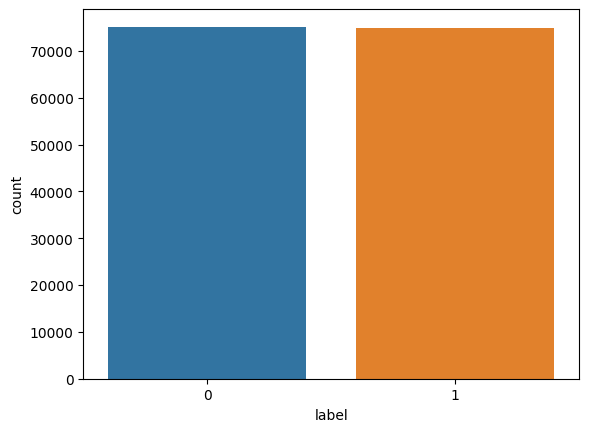

In [42]:
# 레이블별 비율
import seaborn as sns

sns.countplot(x = 'label', data = train_df)

In [44]:
# 결측치 확인
train_df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [45]:
# 결측치(의견없음)가 특정 label 값만 있는지 확인
train_df[train_df['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


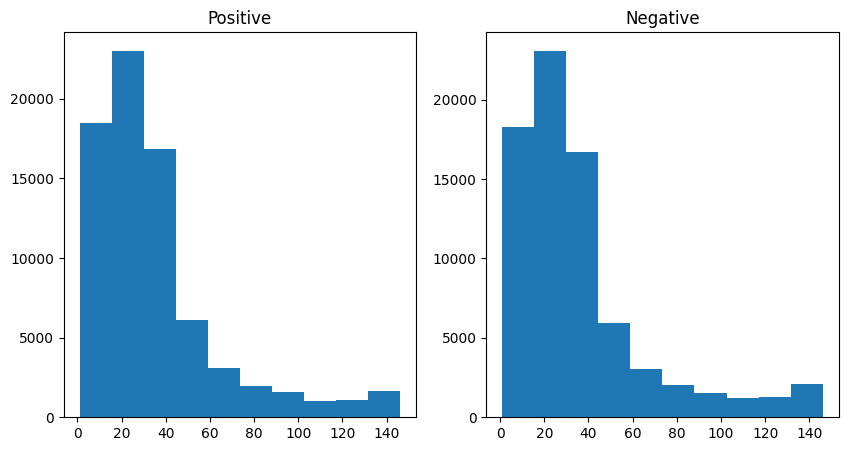

In [48]:
# 레이블별 텍스트 길이
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
data_len = train_df[train_df['label']==1]['document'].str.len()
ax1.hist(data_len)
ax1.set_title('Positive')

data_len = train_df[train_df['label']==0]['document'].str.len()
ax2.hist(data_len)
ax2.set_title('Negative')

plt.show()

📌 형태소 분석기 불러오기

In [1]:
import konlpy
from konlpy import Kkma, Komoran, Okt, Mecab

ImportError: cannot import name 'Kkma' from 'konlpy' (c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\konlpy\__init__.py)